<a href="https://colab.research.google.com/github/sneraikar/Netflix-Movies-and-TV-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title : Netflix Movies and TV shows**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



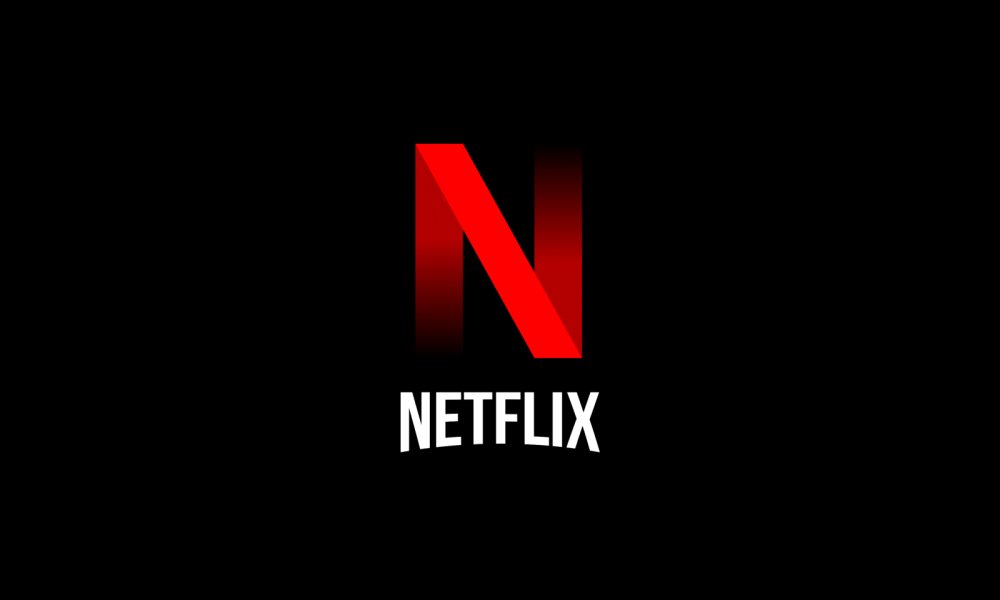

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

First and foremost import all necessary libraries

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as pandas
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold
from sklearn.decomposition import PCA

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings("ignore")



In [4]:
pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
if not os.path.exists("images"):
  os.mkdir("images")

In [6]:
pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [7]:
#mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Read the dataset
df=pd.read_csv("/content/drive/MyDrive/Netflix movies and TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

**To have a look at first few observations**

In [9]:
#first 5 observations
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
#last 5 observations
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**To get the basic information about data**

In [11]:
#Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Data Summary 
> Datset has **7787 rows and 12 features**.

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**create a backup**

In [12]:
df_backup=df.copy()

**Handling Duplicates**

In [13]:
df.duplicated().sum()

0

No duplicates are present

**Null values Handling**

In [14]:
#column-wise null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
#percentage of null values present
for column in df.columns:
  percent=df[column].isnull().sum()  / len(df)*100
  if percent > 0:
   print(f"Percentage of null values present in column {column} is {percent}")

Percentage of null values present in column director is 30.679337357133683
Percentage of null values present in column cast is 9.220495697958135
Percentage of null values present in column country is 6.51085141903172
Percentage of null values present in column date_added is 0.1284191601386927
Percentage of null values present in column rating is 0.08989341209708489


> Out of 12 features, 5 features have null values.

> Columns having nul vallues : **director ,cast,country and date_added**

The percentage of null values present in features "date_added" and "rating" are 0.21% and 0.09% respectively.As this is very less compared to whole dataset we will be dropping these null values.

In [16]:
#remove null value observation of featue "date_added"
df.dropna(subset=["date_added"],inplace=True)

In [17]:
#remove null value observation of featue "rating"
df.dropna(subset=["rating"],inplace=True)

#**Exploratory Data Analysis**

In [18]:
#statistical inforation about datset
df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Observations**:
> Netflix has 25% of its movies and Tv shows released in 2013.

> Netflix has movies and TV shows starting from release date 1925 till 2021.

>75% of Netflix content has been released after 2013.It means that netflix has very less proportion of old movies and TV shows.

**Adding feature using existing feature**

Feature "**date_added**" is object datatype.We will convert it to seperate day,month and year for better analysis.

In [19]:
#create new features out of "date_added"

#first convert date_added to datetime datatype
df["date_added"]=pd.to_datetime(df["date_added"])

#compute day,month and year
df["day_added"]=df["date_added"].dt.day
df["year_added"]=df["date_added"].dt.year
df["month_added"]=df["date_added"].dt.month


In [20]:
#dataframe with features newly added
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,2020,10
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,2019,3
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,2020,9
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,2020,10


**To visulaize the proportion of Movies and TV shows**

**Based on content**

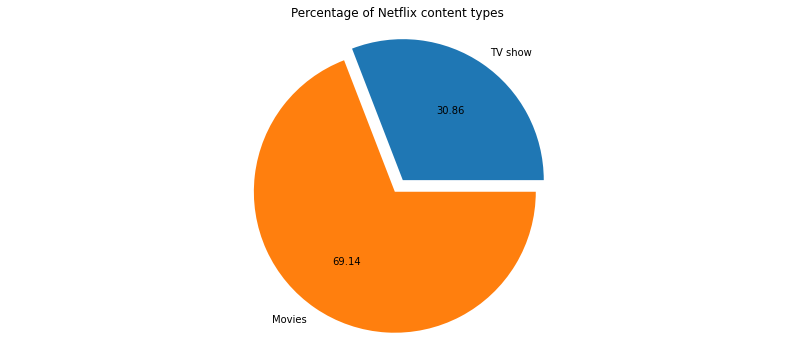

In [21]:
#create a piechart
plt.figure(figsize=(14,6))
plt.pie(df["type"].value_counts().sort_values(),
        labels=["TV show","Movies"],
        explode=[0,0.1],
        autopct="%1.2f")


plt.title("Percentage of Netflix content types")
plt.axis("equal")
plt.show()

**Observation**
> Number of movies is high in Netflix compared to TV shows.

> About 70% of uploads are movies and remaining 30% is TV shows.

#Number of Movies and TV shows added on Netflix

In [22]:
def countplot(x,order,x_label,title):
  #Prints a verticle columns count plot which takes X-axis value, Order, X_label and title of plot
  # Let's check the total count of each class
  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')


  # Plotting the values in dependent variable
  ax=sns.countplot(x=x, data=df,order = order.value_counts().index[:10],
              palette="flare_r")


  #Anotate the bars with their values
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=15,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')


  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)


  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=x_label, ylabel = "")
  plt.title(title)
  plt.show()

**Content added on Yearly basis**

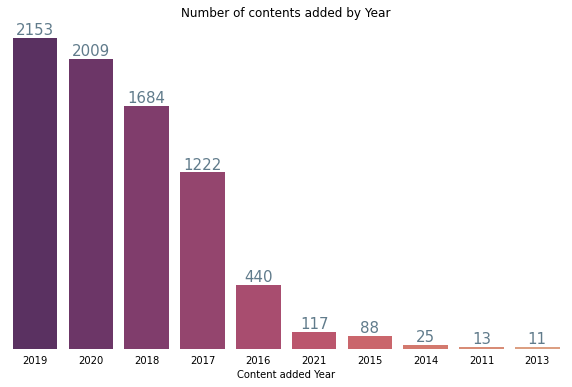

In [23]:
countplot("year_added",df['year_added'],"Content added Year",'Number of contents added by Year')

> We can see that content has been increasing on Netflix year by year.

> There is a sudden increase in from year 2016 to 2017.Netflix was launched in India in 2016 probably to attract more Indian viewers it added more Indian content.

**Content released on Yearly basis**

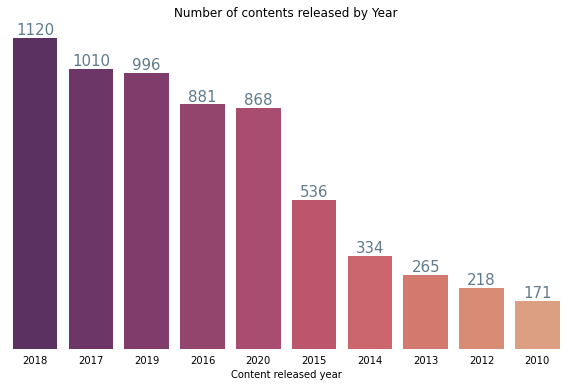

In [24]:
countplot("release_year",df["release_year"],"Content released year",'Number of contents released by Year')

Most of the contents on Netflix is from year 2016 to 2018.

The content has been increasing year by year.

#Top 10 countries where netflix content is most produced

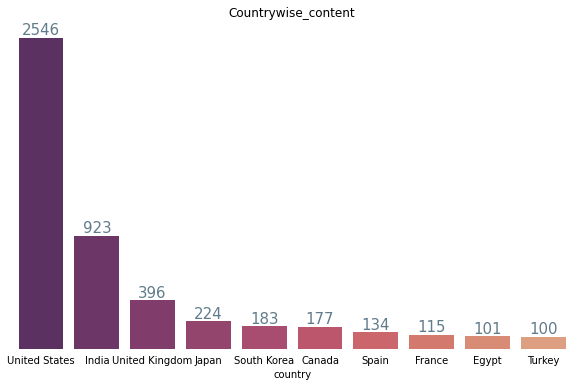

In [25]:
countplot("country",df["country"],"country","Countrywise_content")

United States accounts for majority of content created on netflix.

India has produced second highest contents on Netflix.

#Top 10 Genres on Netflix

In [26]:
# Creating a function to plot insights in a horizontal manner

def countplot_h(y,order,x_label,y_label,title,annotate_len):
  ''' Prints a horizontal columns count plot which takes X-axis value, Order, X_label and title of plot'''

  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')

  ax=sns.countplot(y=y, data=df,order = order.value_counts().index[:10],
              palette="flare_r")

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(annotate_len+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
               '{:1.0f}'.format(width),
               ha='center', va='center')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, 
                  labelleft=True, labelbottom=False)


  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)


  ax.set(xlabel=x_label, ylabel = y_label)
  plt.title(title)


  plt.show()

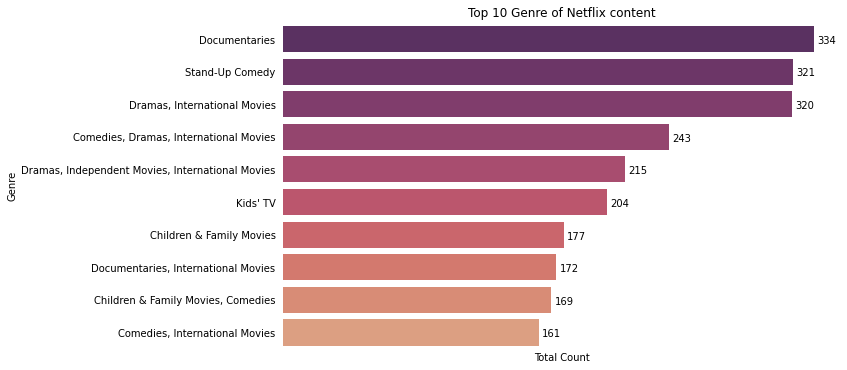

In [27]:
countplot_h("listed_in", df['listed_in'],"Total Count",'Genre','Top 10 Genre of Netflix content',8)

>Top most Genre on Netflix is Documentaries.

> Followed by "Stand-up comedy","Dramas","Kid's TV","Family movies" etc

In [28]:
# Create a list of years when content was added
years = list(range(2008,2020,1))
# Seperate Rows having only movies as content
movie_rows=df.loc[df["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=df.loc[df["type"]=="TV Show"]

movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

Text(0.5, 1.0, 'Movies/TV Shows Added per Year')

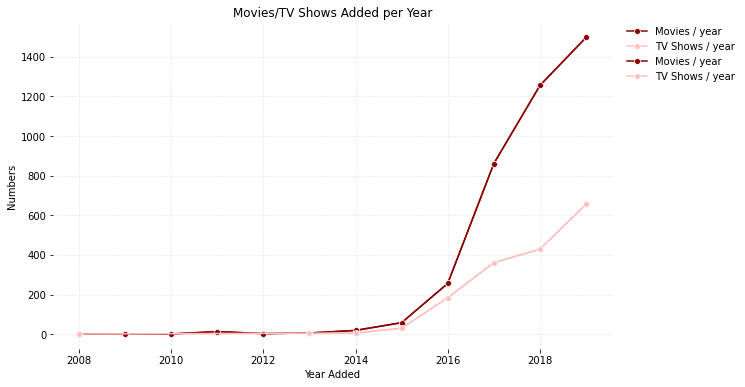

In [29]:
# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame
sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows Added per Year')

Movies and TV shows have significantly increased after 2016.

Number of movies added is much higher compared to TV shows added.

#Ratings

**For Movies:**
* G: Kids
* PG: Older Kids (7+)
* PG-13: Teens (13+)
* NC-17, NR, R, Unrated: Adults (18+)


**For TV Shows:**
* TV-G, TV-Y: Kids
* TV-Y7/FV/PG: Older Kids (7+)
* TV-14: Young Adults (16+)
* TV-MA: Adults (18+)


Text(0.5, 1.0, 'Top content Ratings')

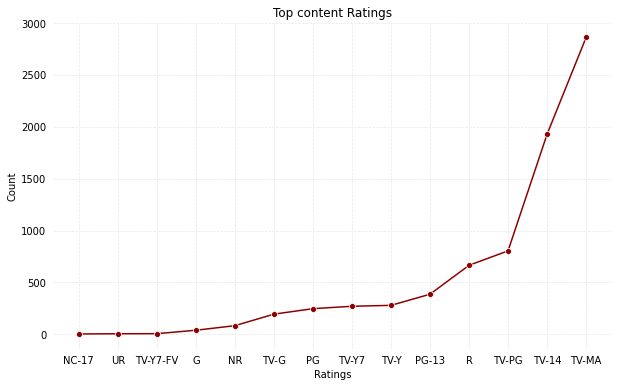

In [30]:
movie_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)

plt.figure(figsize=(10,6))

ax=sns.lineplot( x='rating',y='count',data=movie_ratings,color="#8B0000",marker='o')

# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(65+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

ax.set(xlabel="Ratings", ylabel = "Count")
plt.title('Top content Ratings')



**TV- MA** ratings are highest,followed by TV-14.

#Contents with respect to countries

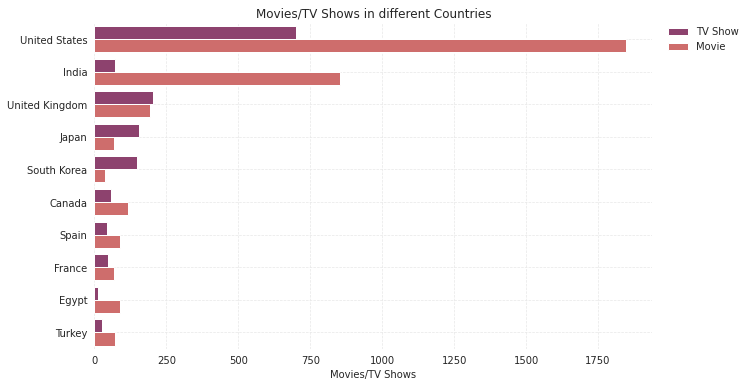

In [31]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plotting the count plot
ax=sns.countplot(y='country',hue="type",data=df,
                 order = df['country'].value_counts().index[:10],
                 palette='flare_r')



# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Movies/TV Shows", ylabel = "")
plt.title("Movies/TV Shows in different Countries")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.show()

> Tv shows are produced in large in United Kingdom,Japan ,South Korea.

> Movies are produced in large in United States,India,Canada,Spain,France,Egypt and Turkey.

Next step after EDA is to make an unsupervised model to perform clustering of contents availabale on Netflix by matching text based features.

#Text Pre-processing